## Implementing Logical AND Function Using Adaline Neural Network

### 1. Initializing Project and Reading Data From CSV Files 
**The source code of this particular project implemented in the src/projects/adaline.py**.

Datasets of this project is in **dataset/adaline/and**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from projects import AdalineNetwork

training_dataset = np.genfromtxt("../dataset/adaline/and/training_dataset.csv", delimiter=',', skip_header=1)
test_dataset = np.genfromtxt("../dataset/adaline/and/test_dataset.csv", delimiter=',', skip_header=1)


### 2. Train The Networks
Now we train our adaline network using train() function of AdalineNetwork class implemented in **adaline.py** in **src/projects**. \
Here we are using learning_rate=1, which can be easily changed.

In [2]:
and_adaline = AdalineNetwork(input_count=2, learning_rate=0.2)

iteration_count = 1
while True:
    old_bias = and_adaline.bias
    old_weights = and_adaline.w.copy()
    for vector in training_dataset:
        and_adaline.train(x=vector[:2], bias=vector[2], target=vector[3])
    
    if not and_adaline.weights_changed(old_weights, old_bias):
        break

    iteration_count += 1

### 3. Plotting Decision Regions and Classifaction Results
In this part we have correct weights for our network \
All we need is line that separate decision regions. \
This line is x2 = b + w1x1 / -w2x2 for 2 inputs.


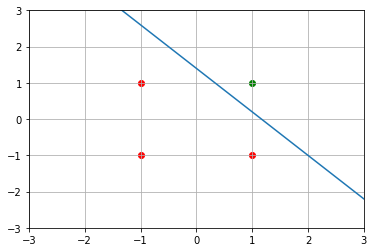

In [10]:
x1 = np.array([-2, 3])
x2 = (and_adaline.bias + and_adaline.w[0] * x1) / (- and_adaline.w[1]) # x2 = b + w1x1 / -w2x2

plt.plot(x1, x2)
for vector in training_dataset:
    # if Target is 1 it means point is in the positive area (green points) otherwise its in the negetive area (red points)
    if vector[3] == 1:  
        plt.scatter(vector[0], vector[1], color='green')
    else:
        plt.scatter(vector[0], vector[1], color='red')

plt.grid()
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()

### 4. Testing The Network and Plotting The Accuracy Chart
Here we plot a bar chart to indicate our accuaracy ratio, by counting number of cases which successfully produces the desired target value.

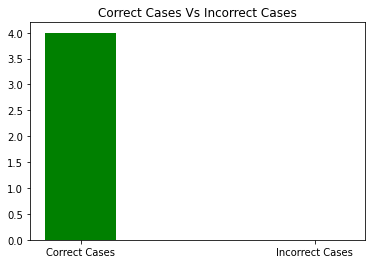

'w1: 0.4285714285714286, w2: 0.3571428571428571, bias: -0.5 | The Iteration Count is 32'

In [4]:
correct_cases = 0
for test_vector in test_dataset:
    net_input = and_adaline.calculate_net_input(x=test_vector[:2])
    result = and_adaline.activation_function(net_input)
    if result == test_vector[2]:
        correct_cases += 1
incorrect_cases = test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'), width=0.3)
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()

f"w1: {and_adaline.w[0]}, w2: {and_adaline.w[1]}, bias: {and_adaline.bias} | The Iteration Count is {iteration_count}"